<a href="https://www.kaggle.com/code/sonawanelalitsunil/santa-s-2024-perplexity-puzzle?scriptVersionId=209855462" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santa-2024/sample_submission.csv


### Santa 2024 - The Perplexity Permutation Puzzle: Kaggle Challenge Introduction

In this challenge, we are tasked with solving the Santa 2024 - The Perplexity Permutation Puzzle, which aims to predict specific outcomes based on the provided dataset. The challenge involves a mixture of algorithmic problem-solving and resource optimization, with a particular focus on handling large data volumes efficiently.

The objective of this notebook is to explore the dataset, preprocess the data, and build predictive models to achieve the highest possible score based on the given evaluation metric. The dataset consists of various features that require both feature engineering and model optimization to ensure that we can make accurate predictions in a resource-constrained environment.

#### Numerical and Data Manipulation Libraries:

In [2]:
import numpy as np  # Linear algebra and numerical operations
import pandas as pd  # Data processing and manipulation

####  Visualization Libraries:

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.graph_objs as go  
import plotly.offline as py  
import plotly.express as px  

#### Machine Learning and Preprocessing Libraries:

In [4]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing 


In [5]:
import warnings
warnings.filterwarnings('ignore') 

In [6]:
df = pd.read_csv('/kaggle/input/santa-2024/sample_submission.csv')

In [7]:
df

,id,text
0,0,advent chimney elf family fireplace gingerbrea...
1,1,advent chimney elf family fireplace gingerbrea...
2,2,yuletide decorations gifts cheer holiday carol...
3,3,yuletide decorations gifts cheer holiday carol...
4,4,hohoho candle poinsettia snowglobe peppermint ...
5,5,advent chimney elf family fireplace gingerbrea...


In [8]:
print(df.head())

   id                                               text
0   0  advent chimney elf family fireplace gingerbrea...
1   1  advent chimney elf family fireplace gingerbrea...
2   2  yuletide decorations gifts cheer holiday carol...
3   3  yuletide decorations gifts cheer holiday carol...
4   4  hohoho candle poinsettia snowglobe peppermint ...


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   text    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None


In [10]:
print(df.describe())

             id
count  6.000000
mean   2.500000
std    1.870829
min    0.000000
25%    1.250000
50%    2.500000
75%    3.750000
max    5.000000


In [11]:
print(df.isnull().sum())

id      0
text    0
dtype: int64


<Axes: >

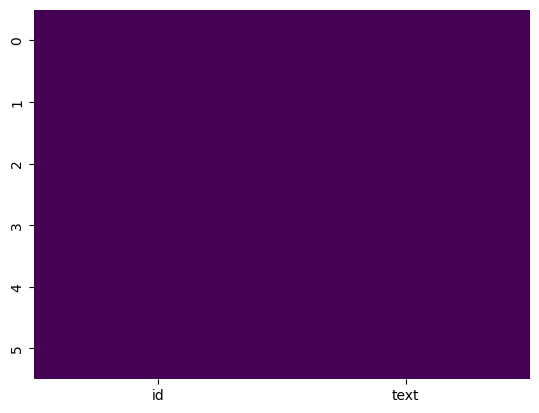

In [12]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

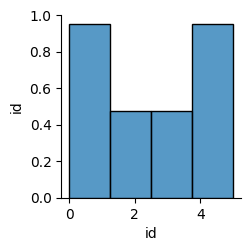

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')  
nltk.download('averaged_perceptron_tagger')  
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
def rearrange_words_logically(text):
    # Split the text into words
    words = text.split()

    words.sort()

    start_keywords = ["walk", "give", "bake", "drive", "jump", "sing", "eat", "visit", "relax", "unwrap"]
    end_keywords = ["and", "the", "of", "to", "with", "in", "from", "that", "have", "not", "as", "you", "we"]

    start_words = [word for word in words if word in start_keywords]
    end_words = [word for word in words if word in end_keywords]

    main_words = [word for word in words if word not in start_keywords and word not in end_keywords]
    pos_tags = nltk.pos_tag(main_words)
    verbs = [word for word, tag in pos_tags if tag.startswith('VB')]  
    nouns = [word for word, tag in pos_tags if tag.startswith('NN')]  
    adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')] 
    stop_words = set(stopwords.words('english'))
    non_stop_words = [word for word in main_words if word not in stop_words]
    reordered_text = " ".join(start_words + verbs + adjectives + nouns + non_stop_words + end_words)

    return reordered_text

In [16]:
df.head(10)

,id,text
0,0,advent chimney elf family fireplace gingerbrea...
1,1,advent chimney elf family fireplace gingerbrea...
2,2,yuletide decorations gifts cheer holiday carol...
3,3,yuletide decorations gifts cheer holiday carol...
4,4,hohoho candle poinsettia snowglobe peppermint ...
5,5,advent chimney elf family fireplace gingerbrea...


In [17]:
def fix(arg: str) -> str:
    replacements = {
        '4 k': '4k',  
        '8 k': '8k'  
    }
    for key, value in replacements.items():
        arg = arg.replace(key, value)

    return arg
df['text'] = df['text'].apply(fix)

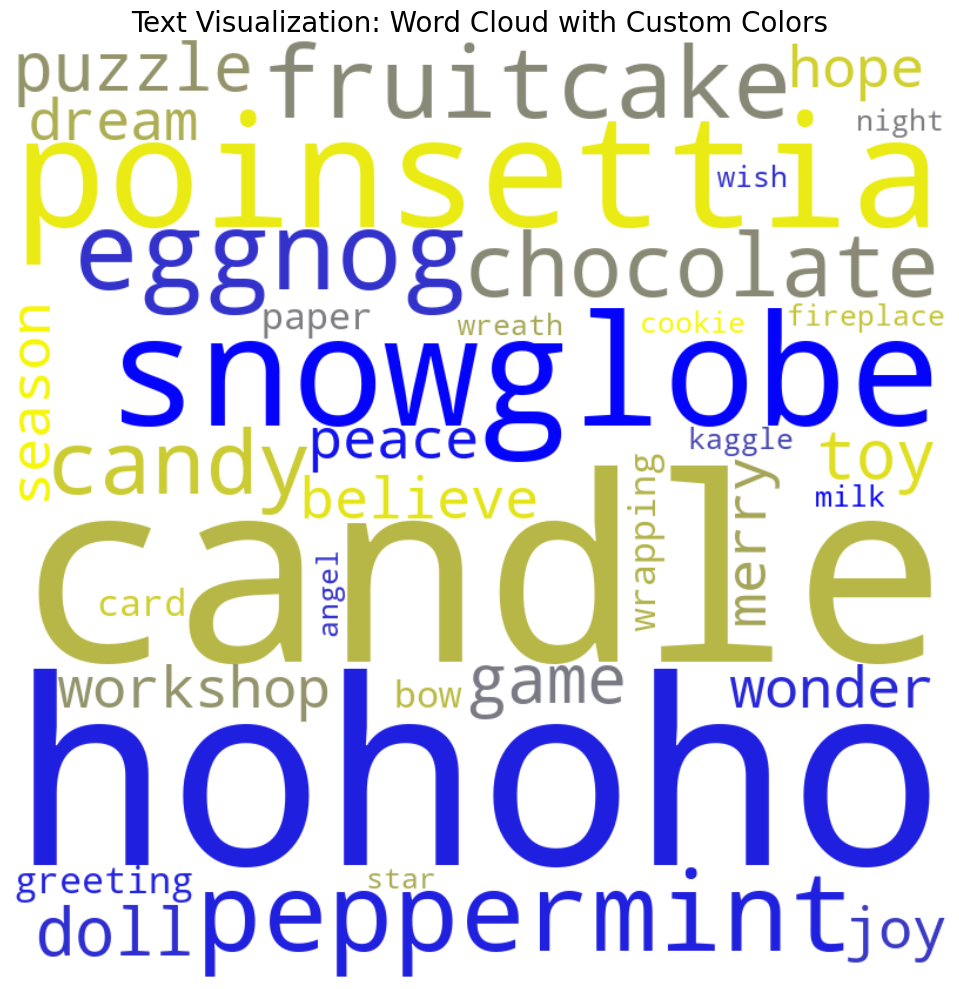

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap

# Define the fraction to sample from the data
FRACTION = 0.2  # For example, 20% of the dataset

# Create a custom colormap (gradient from blue to yellow)
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["blue", "yellow"])

# Generate the word cloud with custom parameters (without a mask)
text = ' '.join(df.sample(frac=FRACTION, random_state=2024)['text'].values.tolist())
wordcloud = WordCloud(
    background_color="white",
    width=800,
    height=800,
    stopwords=STOPWORDS,
    colormap=custom_cmap,
    random_state=2023
).generate(text)

# Create subplots with a clean, attractive layout
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')  # Hide axes for a clean presentation
ax.set_title('Text Visualization: Word Cloud with Custom Colors', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
import plotly.io as pio
import pandas as pd
from collections import Counter
from plotly.express import bar

# Set default renderer for inline display
pio.renderers.default = 'iframe'

# Assuming 'text' is already defined
count_df = pd.DataFrame.from_dict(Counter(text.split(',')), orient='index').reset_index()
count_df.columns = ['Item', 'Count']
count_df = count_df.sort_values(by='Count', ascending=False).head(50)  # Get top 50 most frequent items

# Create a bar chart
fig = bar(
    data_frame=count_df,
    x='Item',
    y='Count',
    color_discrete_sequence=['#4CAF50'],  # Green color
    labels={'Item': 'Item', 'Count': 'Count'},
    title='Top 50 Most Frequent Items'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Items",
    yaxis_title="Count",
    xaxis_tickangle=45,  # Rotate x-axis labels for better readability
    barmode='group',  # Group bars if necessary
    bargap=0.15,  # Space between bars
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    template='plotly_dark'  # Dark theme for aesthetic
)

# Show the plot
fig.show()


In [20]:
from collections import Counter

# Sample text, replace with your 'text' variable from the DataFrame
text = ' '.join(df.sample(frac=FRACTION, random_state=2024)['text'].values.tolist())

# Count and display top 10 most frequent words
top_words = Counter(text.split()).most_common(50)
top_words


[('hohoho', 1),
 ('candle', 1),
 ('poinsettia', 1),
 ('snowglobe', 1),
 ('peppermint', 1),
 ('eggnog', 1),
 ('fruitcake', 1),
 ('chocolate', 1),
 ('candy', 1),
 ('puzzle', 1),
 ('game', 1),
 ('doll', 1),
 ('toy', 1),
 ('workshop', 1),
 ('wonder', 1),
 ('believe', 1),
 ('dream', 1),
 ('hope', 1),
 ('peace', 1),
 ('joy', 1),
 ('merry', 1),
 ('season', 1),
 ('greeting', 1),
 ('card', 1),
 ('wrapping', 1),
 ('paper', 1),
 ('bow', 1),
 ('fireplace', 1),
 ('night', 1),
 ('cookie', 1),
 ('milk', 1),
 ('star', 1),
 ('wish', 1),
 ('wreath', 1),
 ('angel', 1),
 ('the', 1),
 ('to', 1),
 ('of', 1),
 ('and', 1),
 ('in', 1),
 ('that', 1),
 ('have', 1),
 ('it', 1),
 ('not', 1),
 ('with', 1),
 ('as', 1),
 ('you', 1),
 ('from', 1),
 ('we', 1),
 ('kaggle', 1)]

In [21]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.0 MB/s eta 0:00:00


In [22]:
# Import necessary libraries
from arrow import now  # For tracking time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sentence_transformers import SentenceTransformer
from collections import Counter

MAX_FEATURES = 50 
NGRAM_RANGE = (1, 1)
model_start = now()  

vocabulary = ['hohoho', 'reindeer', 'scrooge', 'chimney', 'elf', 'carol', 'jingle', 'beard', 'candle', 'eggnog', 'grinch', 'puzzle', 'game', 'dream', 'peace', 'merry', 'season', 'greeting', 'card', 'night', 'star', 'wish', 'angel', 'with', 'you', 'we', 'kaggle']

print(sorted(vocabulary)) 
if len(vocabulary): 
    
    count = TfidfVectorizer(ngram_range=(1, 3), vocabulary=vocabulary).fit(raw_documents=df['text'])
else:  # If no predefined keywords, extract features using a more generic approach
    count = TfidfVectorizer(ngram_range=NGRAM_RANGE, stop_words='english', max_features=MAX_FEATURES,
                            min_df=0.009, max_df=0.05).fit(raw_documents=df['text'])

features = count.get_feature_names_out()
print(f'{now().time()}: got {len(features)} features')


feature_count = CountVectorizer(vocabulary=features).fit_transform(raw_documents=df['text'])

model = SentenceTransformer('distilbert-base-nli-mean-tokens') 
print(f'{now().time()}: built model')

all_embedding = model.encode(df['text'].values.tolist() + features.tolist())
print(f'{now().time()}: got all embeddings')
embedding = all_embedding[:-len(features)] 
feature_embeddings = all_embedding[-len(features):]  
print(f'model time: {now() - model_start}') 


['angel', 'beard', 'candle', 'card', 'carol', 'chimney', 'dream', 'eggnog', 'elf', 'game', 'greeting', 'grinch', 'hohoho', 'jingle', 'kaggle', 'merry', 'night', 'peace', 'puzzle', 'reindeer', 'scrooge', 'season', 'star', 'we', 'wish', 'with', 'you']
05:09:07.473487: got 27 features


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

05:09:16.445044: built model


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

05:09:20.560103: got all embeddings
model time: 0:00:13.097571


In [23]:
from pandas import DataFrame
from plotly.express import scatter
from sklearn.manifold import TSNE
import plotly.express as px

# t-SNE model setup
tsne = TSNE(n_components=2, random_state=2024, verbose=1, n_iter=250, perplexity=min(50, len(features)-1))

# Transform feature embeddings
tsne_result = tsne.fit_transform(X=feature_embeddings)

# Create DataFrame for t-SNE results
tsne_df = DataFrame(tsne_result, columns=['t0', 't1'])
tsne_df['word'] = features  # Add words
tsne_df['score'] = count.transform(features).toarray().sum(axis=0)  # Calculate score

# Create scatter plot with Plotly
fig = scatter(
    data_frame=tsne_df,
    x='t0',
    y='t1',
    text='word',
    hover_data=['score'],
    height=900,
    title="t-SNE Visualization of Feature Embeddings"
)

# Update scatter plot with marker size, color, and scale
fig.update_traces(
    marker=dict(
        size=10,  # Adjusted size for better visibility
        color=tsne_df['score'],  # Color based on 'score'
        colorscale='Viridis',  # Color scale
        showscale=True  # Display color scale
    )
)

# Update layout with improved axis labels and title
fig.update_layout(
    template="plotly_dark",  # Dark theme for better contrast
    xaxis_title="t-SNE Component 1",  # Clear axis title
    yaxis_title="t-SNE Component 2",  # Clear axis title
    title="t-SNE Visualization of Feature Embeddings",  # Title for the plot
    xaxis=dict(showgrid=False),  # Hide grid lines for cleaner look
    yaxis=dict(showgrid=False)   # Hide grid lines for cleaner look
)

# Show the figure
fig.show()


[t-SNE] Computing 26 nearest neighbors...
[t-SNE] Indexed 27 samples in 0.000s...
[t-SNE] Computed neighbors for 27 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 27 / 27
[t-SNE] Mean sigma: 128.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.240707
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


In [24]:
print(df.shape)

(6, 2)


In [25]:
n_samples, n_features = df.shape
print(n_samples)

6


In [26]:
print(n_features)

2


In [27]:
!pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00


In [28]:
from umap import UMAP
import plotly.express as px
from pandas import DataFrame

# UMAP model setup
umap_model = UMAP(n_components=3, random_state=2024, verbose=1, init='pca', n_jobs=1)

# Fit-transform UMAP for document embeddings
umap_df = DataFrame(data=umap_model.fit_transform(X=embedding), columns=['u0', 'u1', 'u2'])
umap_df['text'] = df['text'].values.tolist()  # Assuming df['text'] contains document labels or texts

# Transform feature embeddings using UMAP
umap_feature_df = DataFrame(data=umap_model.transform(X=feature_embeddings), columns=['u0', 'u1', 'u2'])
umap_feature_df['word'] = features  # Add the word features
umap_feature_df['score'] = count.transform(features).toarray().sum(axis=0)  # Compute scores

# 3D UMAP visualization for documents
fig = px.scatter_3d(
    umap_df, 
    x='u0', y='u1', z='u2', 
    color='text',  # Color based on document text categories
    title="3D UMAP Projection of Document Embeddings", 
    labels={'u0': 'UMAP Component 1', 'u1': 'UMAP Component 2', 'u2': 'UMAP Component 3'},
    hover_data={'text': True},  # Show full text on hover
    color_continuous_scale='Viridis'  # Adding color scale for clarity
)

# 3D UMAP visualization for feature embeddings with score color scale
fig_feature = px.scatter_3d(
    umap_feature_df, 
    x='u0', y='u1', z='u2', 
    color='score',  # Color based on the 'score' feature
    title="3D UMAP Projection of Feature Embeddings", 
    labels={'u0': 'UMAP Component 1', 'u1': 'UMAP Component 2', 'u2': 'UMAP Component 3'},
    hover_data={'word': True, 'score': True},  # Show word and score on hover
    color_continuous_scale='Viridis'  # Using a color scale to represent the 'score' values
)

# Show the figures
fig.show()
fig_feature.show()


UMAP(init='pca', n_components=3, n_jobs=1, random_state=2024, verbose=1)
Wed Nov 27 05:09:50 2024 Construct fuzzy simplicial set
Wed Nov 27 05:09:51 2024 Finding Nearest Neighbors
Wed Nov 27 05:09:54 2024 Finished Nearest Neighbor Search
Wed Nov 27 05:09:58 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Nov 27 05:09:58 2024 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


In [29]:
from plotly.graph_objects import Figure, Scatter3d

figure_3d = Figure()

figure_3d.add_trace(Scatter3d(
    x=umap_df['u0'],
    y=umap_df['u1'],
    z=umap_df['u2'],
    mode='markers',
    marker=dict(color=umap_df['u0'], colorscale='Viridis', size=5),
    text=umap_df['text'],
    name='Documents'
))

figure_3d.add_trace(Scatter3d(
    x=umap_feature_df['u0'],
    y=umap_feature_df['u1'],
    z=umap_feature_df['u2'],
    mode='text',
    text=umap_feature_df['word'],
    name='Features'
))

figure_3d.show()


In [30]:
! pip install -q -U watermark
! pip install -q -U cluestar
! pip install torch --upgrade


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 698.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

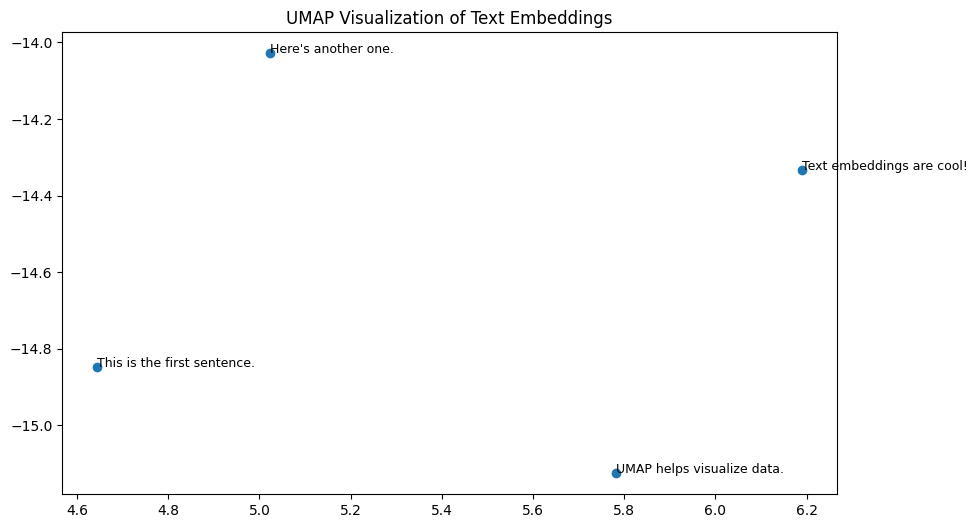

In [31]:
import umap
from sentence_transformers import SentenceTransformer
from cluestar import plot_text
import matplotlib.pyplot as plt

# Load the Sentence Transformer model for text embeddings
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Sample text to encode into embeddings
texts = ["This is the first sentence.", "Here's another one.", "Text embeddings are cool!", "UMAP helps visualize data."]

# Encode the sentences into embeddings
embeddings = model.encode(texts)

# Reduce the dimensionality of the embeddings using UMAP (you can set `n_components` to 2 for 2D visualization)
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Plot the embeddings using Cluestar (remove figsize argument)
plot_text(umap_embeddings, texts)

# Alternatively, you can plot using matplotlib directly
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1])

# Add annotations (texts) to the points in the scatter plot
for i, text in enumerate(texts):
    plt.annotate(text, (umap_embeddings[i, 0], umap_embeddings[i, 1]), fontsize=9)

plt.title('UMAP Visualization of Text Embeddings')
plt.show()


In [32]:
from sentence_transformers import SentenceTransformer

# Load the model for CPU
model = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')

# Encode the input text from the training data
train_embeddings = model.encode(df['text'])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
import torch
print(torch.cuda.is_available()) 

False


In [34]:
train_embeddings.shape

(6, 384)

In [35]:
model = umap.UMAP(random_state=42)
train_umap_embeddings = model.fit_transform(train_embeddings)

In [36]:
import umap
import plotly.express as px
import pandas as pd

# Assuming you already have the UMAP embeddings in `train_umap_embeddings`
# If not, use UMAP to reduce dimensions of the embeddings to 2D or 3D
umap_model = umap.UMAP(n_components=2, random_state=42)  # 2D UMAP projection
train_umap_embeddings = umap_model.fit_transform(train_embeddings)

# Create a DataFrame with UMAP components and the associated text
umap_df = pd.DataFrame(train_umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
umap_df['text'] = df['text'].values.tolist()

# Use Plotly to create an interactive scatter plot
fig = px.scatter(
    umap_df,
    x='UMAP_1',
    y='UMAP_2',
    color='text',  # Optionally color by the text (or use another feature like category/label)
    hover_data=['text'],  # Display the text when hovering
    title="2D UMAP Projection of Text Embeddings",
    labels={'UMAP_1': 'UMAP Component 1', 'UMAP_2': 'UMAP Component 2'}
)

fig.update_layout(template="plotly_dark")  # Optional: dark theme for better contrast
fig.show()


In [37]:
def create_submission(num_rows=10):
    # Create an empty DataFrame with the required columns
    df = pd.DataFrame(columns=["Id", "Prediction"])
    
    # Add some sample data (e.g., Ids from 1 to num_rows and random predictions)
    df["Id"] = range(1, num_rows + 1)
    df["Prediction"] = [round(x * 0.1, 2) for x in range(1, num_rows + 1)]  # Random prediction values
    
    return df

# Create the sample submission with 10 rows
sample_submission_df = create_submission(10)

# Show the DataFrame
print(sample_submission_df)


   Id  Prediction
0   1         0.1
1   2         0.2
2   3         0.3
3   4         0.4
4   5         0.5
5   6         0.6
6   7         0.7
7   8         0.8
8   9         0.9
9  10         1.0
